In [1]:
def print_unique_words_number():
    print("Number of unique words in {0} dataset: {1}".format(1, len(Counter(uq_dict1))))
    print("Number of unique words in {0} spam dataset: {1}".format(1, len(Counter(uq_dict1_spam))))
    print("Number of unique words in {0} ham dataset: {1}".format(1, len(Counter(uq_dict1_ham))))
    print("------------------------------------------------------------------------")
    print("Number of unique words in {0} dataset: {1}".format(2, len(Counter(dict2))))
    print("Number of unique words in {0} spam dataset: {1}".format(2, len(Counter(dict2_spam))))
    print("Number of unique words in {0} ham dataset: {1}".format(2, len(Counter(dict2_ham))))
    print("------------------------------------------------------------------------")

def print_loaded_data():
    print("First dataset form {0}: \n {1}\n\n\n".format(PATH_DATASET1, df_dataset1))
    print("Spam from first dataset:\n {0}\n\n\n".format(df_dataset1_spam))
    print("Nonspam from first dataset:\n {0}\n\n\n".format(df_dataset1_ham))
    print("------------------------------------------------------------------------")
    print("Second dataset form {0}: \n {1}\n\n\n".format(PATH_DATASET2, df_dataset2))
    print("Spam from second dataset:\n {0}\n\n\n".format(df_dataset2_spam))
    print("Nonspam from second dataset:\n {0}\n\n\n".format(df_dataset2_ham))
    print("------------------------------------------------------------------------")

In [2]:
# Imports
import  pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Consts
PATH_DATASET1 = "../data/raw/spamham.csv"
PATH_DATASET2 = "../data/raw/spam_or_not_spam.csv"
HEADER_NAMES = ["text", "is_spam"]

# Load data to dataframe
df_dataset1 = pd.read_csv(PATH_DATASET1, names=HEADER_NAMES, header=None).dropna()
df_dataset2 = pd.read_csv(PATH_DATASET2, names=HEADER_NAMES, header=None).dropna()

# Load spam and non spam dataframes
df_dataset1_spam = df_dataset1[df_dataset1[HEADER_NAMES[1]] == 1]
df_dataset1_ham = df_dataset1[df_dataset1[HEADER_NAMES[1]] == 0]

df_dataset2_spam = df_dataset2[df_dataset2[HEADER_NAMES[1]] == 1]
df_dataset2_ham = df_dataset2[df_dataset2[HEADER_NAMES[1]] == 0]

# Print data
#print_loaded_data()

In [3]:
def create_dict_unique(df_org, char=' '):
    """
    Split text data to numpy array and create column with unique word dictionary

    :param df_org: dataframe with text column
    :param char: split text by this character
    :return: dataframe with dict and splited text
    """

    df = df_org.copy()
    # split by char
    df[HEADER_NAMES[0]] = df[HEADER_NAMES[0]].apply(lambda text: np.array(text.split(char)))
    df["dict"] = df[HEADER_NAMES[0]].apply(
        lambda text: dict(zip(np.unique(text, return_counts=True)[0], [1]*len(np.unique(text)))))
    return df

def create_dict_counts(df_org, char=' '):
    """
    Split text data to numpy array and create column with words count dictionary

    :param df_org: dataframe with text column
    :param char: split text by this character
    :return: dataframe with dict and splited text
    """

    df = df_org.copy()
    # split by char
    df[HEADER_NAMES[0]] = df[HEADER_NAMES[0]].apply(lambda text: np.array(text.split(char)))
    df["dict"] = df[HEADER_NAMES[0]].apply(
        lambda text: dict(zip(np.unique(text, return_counts=True)[0],
                              np.unique(text, return_counts=True)[1])))
    return df

def concat_dict(df):
    """
    Calc dict with add up all words from dataframe

    :param df: dataframe with dict column
    :return: return merged dict with all words and their count
    """
    return dict((df["dict"].apply(lambda x: Counter(x))).sum())

In [4]:
# # COUNT
# Load dataframes with counted word in mail
df_dict1 = create_dict_counts(df_dataset1)
df_dict1_spam = create_dict_counts(df_dataset1_spam)
df_dict1_ham = create_dict_counts(df_dataset1_ham)

df_dict2 = create_dict_counts(df_dataset2)
df_dict2_spam = create_dict_counts(df_dataset2_spam)
df_dict2_ham = create_dict_counts(df_dataset2_ham)

# Load dicts with sum
dict1 = concat_dict(df_dict1)
dict1_spam = concat_dict(df_dict1_spam)
dict1_ham = concat_dict(df_dict1_ham)

dict2 = concat_dict(df_dict2)
dict2_spam = concat_dict(df_dict2_spam)
dict2_ham = concat_dict(df_dict2_ham)

# Save words in ascending order
max_values1 = Counter(dict1).most_common(len(Counter(dict1)))
max_values1_spam = Counter(dict1_spam).most_common(len(Counter(dict1_spam)))
max_values1_ham = Counter(dict1_ham).most_common(len(Counter(dict1_ham)))

max_values2 = Counter(dict2).most_common(len(Counter(dict2)))
max_values2_spam = Counter(dict2_spam).most_common(len(Counter(dict2_spam)))
max_values2_ham = Counter(dict2_ham).most_common(len(Counter(dict2_ham)))

# # UNIQUE
# Load dataframes with unique word in mail
uq_df_dict1 = create_dict_unique(df_dataset1)
uq_df_dict1_spam = create_dict_unique(df_dataset1_spam)
uq_df_dict1_ham = create_dict_unique(df_dataset1_ham)

uq_df_dict2 = create_dict_unique(df_dataset2)
uq_df_dict2_spam = create_dict_unique(df_dataset2_spam)
uq_df_dict2_ham = create_dict_unique(df_dataset2_ham)

# Load dicts with sum
uq_dict1 = concat_dict(uq_df_dict1)
uq_dict1_spam = concat_dict(uq_df_dict1_spam)
uq_dict1_ham = concat_dict(uq_df_dict1_ham)

uq_dict2 = concat_dict(uq_df_dict2)
uq_dict2_spam = concat_dict(uq_df_dict2_spam)
uq_dict2_ham = concat_dict(uq_df_dict2_ham)

# Save words in ascending order
uq_max_values1 = Counter(uq_dict1).most_common(len(Counter(uq_dict1)))
uq_max_values1_spam = Counter(uq_dict1_spam).most_common(len(Counter(uq_dict1_spam)))
uq_max_values1_ham = Counter(uq_dict1_ham).most_common(len(Counter(uq_dict1_ham)))

uq_max_values2 = Counter(uq_dict2).most_common(len(Counter(uq_dict2)))
uq_max_values2_spam = Counter(uq_dict2_spam).most_common(len(Counter(uq_dict2_spam)))
uq_max_values2_ham = Counter(uq_dict2_ham).most_common(len(Counter(uq_dict2_ham)))

Count dict:
 0       {'': 18, '%': 1, ''': 1, ',': 4, '-': 4, '.': ...
1       {'': 4, 'Subject:': 1, 'albeit': 1, 'and': 3, ...
2       {'': 9, '$': 1, ',': 2, '-': 1, '.': 3, '1': 1...
3       {'': 7, '!': 2, '&': 1, '(': 4, ')': 4, ',': 1...
4       {'': 3, '!': 1, ''': 2, ',': 1, '.': 7, '?': 1...
                              ...                        
5723    {'': 26, '!': 1, '$': 1, '&': 1, ',': 7, '-': ...
5724    {'': 34, '"': 2, '(': 2, ')': 2, ',': 6, '-': ...
5725    {'': 76, '!': 1, '"': 2, ''': 3, '(': 5, ')': ...
5726    {'': 36, '(': 2, ')': 2, ',': 5, '-': 52, '.':...
5727    {'': 48, '!': 1, '"': 2, '&': 3, ''': 6, '(': ...
Name: dict, Length: 5728, dtype: object


Unique dict:
 0       {'': 1, '%': 1, ''': 1, ',': 1, '-': 1, '.': 1...
1       {'': 1, 'Subject:': 1, 'albeit': 1, 'and': 1, ...
2       {'': 1, '$': 1, ',': 1, '-': 1, '.': 1, '1': 1...
3       {'': 1, '!': 1, '&': 1, '(': 1, ')': 1, ',': 1...
4       {'': 1, '!': 1, ''': 1, ',': 1, '.': 1, '?': 1...
   

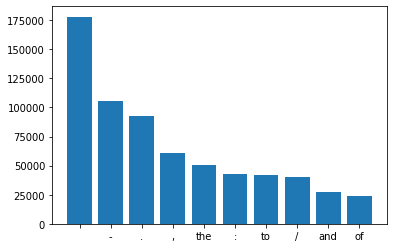

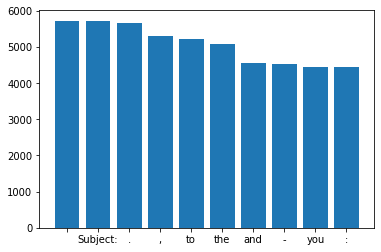

In [5]:
#TODO: Filter word: delete with dict, delete single words etc...

# Print dataframes dict
print("Count dict:\n {0}\n\n".format(df_dict1["dict"]))
print("Unique dict:\n {0}\n\n".format(uq_df_dict1["dict"]))

# Print number of words
print("print_words_number")
print_unique_words_number()

# Plot number of counted words
print("Sum")
plot_dict = dict(max_values1[0:10])
plt.bar(list(plot_dict.keys()), list(plot_dict.values()))
plt.show()

# Plot number of unique words
print("Unique")
plot_dict = dict(uq_max_values1[0:10])
plt.bar(list(plot_dict.keys()), list(plot_dict.values()))
plt.show()


In [6]:
# paths to save file
UQ_PATH_SAVE_DATASET1 = "../data/processed/unique_dataset1.csv"
UQ_PATH_SAVE_DATASET1_SPAM = "../data/processed/unique_dataset1_spam.csv"
UQ_PATH_SAVE_DATASET1_HAM = "../data/processed/unique_dataset1_ham.csv"

UQ_PATH_SAVE_DATASET2 = "../data/processed/unique_dataset2.csv"
UQ_PATH_SAVE_DATASET2_SPAM = "../data/processed/unique_dataset2_spam.csv"
UQ_PATH_SAVE_DATASET2_HAM = "../data/processed/unique_dataset2_ham.csv"

df_save1 = pd.DataFrame(uq_max_values1)
df_save1_spam = pd.DataFrame(uq_max_values1_spam)
df_save1_ham = pd.DataFrame(uq_max_values1_ham)

# header of file: NUMBER OF UNIQUE WORDS, EMAILS
df_save1.to_csv(UQ_PATH_SAVE_DATASET1, index=False,
                    header=[str(len(Counter(uq_dict1))), str(len(uq_df_dict1["dict"]))])
df_save1_spam.to_csv(UQ_PATH_SAVE_DATASET1_SPAM, index=False,
                    header=[str(len(Counter(uq_dict1_spam))), str(len(uq_df_dict1_spam["dict"]))])
df_save1_ham.to_csv(UQ_PATH_SAVE_DATASET1_HAM, index=False,
                    header=[str(len(Counter(uq_dict1_ham))), str(len(uq_df_dict1_ham["dict"]))])

